# 把这文件放在和mlearn/同一层文件夹运行
## 不然import会报错

In [1]:
import mlearn
from mlearn import functional as F
from mlearn import layers
from mlearn.optimizers import SGD, RMSProp
from torchvision import datasets,transforms
import torch
import numpy as np
import matplotlib.pyplot as plt
from mlearn import DataLoader

# 加载数据集

In [2]:
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                     transform = transforms.Compose([transforms.ToTensor()]))

dataset = DataLoader((train.data,train.targets),batch_size=32,shuffle=True)


_trainset = torch.utils.data.DataLoader(train,batch_size=32, shuffle=True)
_testset = torch.utils.data.DataLoader(test, batch_size=32, shuffle=True)

trainset = []
testset = []
for batch in _trainset:
     trainset.append((batch[0].detach().numpy(),batch[1].detach().numpy()))
for batch in _testset:
     testset.append((batch[0].detach().numpy(),batch[1].detach().numpy()))

In [3]:
class Net(mlearn.Module):
    def __init__(self):
        self.dense1 = layers.Dense(784,300)
        self.dense2 = layers.Dense(300,100)
        self.dense3 = layers.Dense(100,10)
        
    def forward(self, inputs):
        o = self.dense1(inputs)
        o = F.relu(o)
        o = self.dense2(o)
        o = F.tanh(o)
        o = self.dense3(o)
        return (o)
    
net = Net()


In [4]:
hist = []
net = Net()
optimizer = SGD(net,0.01)
EPOCHS = 10
net.zero_grad()
for epoch in range(EPOCHS):
    running_loss = 0.0
    for i, batch in enumerate(trainset, 0):
        features, labels = batch
        features = mlearn.tensor(features.reshape(-1,784),requires_grad=True)
        labels = mlearn.tensor(labels)
        net.zero_grad()
        predict = net(features)
        loss = F.cross_entropy(predict, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.data
        if i % 300 == 299:   
            hist.append(running_loss/300)
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 300),"\t")
            running_loss = 0.0
print('trainning completed!')


[1,   300] loss: 0.767 	
[1,   600] loss: 0.388 	
[1,   900] loss: 0.325 	
[1,  1200] loss: 0.294 	
[1,  1500] loss: 0.270 	
[1,  1800] loss: 0.235 	
[2,   300] loss: 0.235 	
[2,   600] loss: 0.217 	
[2,   900] loss: 0.208 	
[2,  1200] loss: 0.201 	
[2,  1500] loss: 0.194 	
[2,  1800] loss: 0.171 	
[3,   300] loss: 0.179 	
[3,   600] loss: 0.169 	
[3,   900] loss: 0.164 	
[3,  1200] loss: 0.160 	
[3,  1500] loss: 0.157 	
[3,  1800] loss: 0.139 	
[4,   300] loss: 0.148 	
[4,   600] loss: 0.140 	
[4,   900] loss: 0.137 	
[4,  1200] loss: 0.135 	
[4,  1500] loss: 0.133 	
[4,  1800] loss: 0.118 	
[5,   300] loss: 0.127 	
[5,   600] loss: 0.120 	
[5,   900] loss: 0.118 	
[5,  1200] loss: 0.117 	
[5,  1500] loss: 0.115 	
[5,  1800] loss: 0.102 	
[6,   300] loss: 0.112 	
[6,   600] loss: 0.105 	
[6,   900] loss: 0.103 	
[6,  1200] loss: 0.103 	
[6,  1500] loss: 0.102 	
[6,  1800] loss: 0.090 	
[7,   300] loss: 0.100 	
[7,   600] loss: 0.093 	
[7,   900] loss: 0.092 	
[7,  1200] loss: 0.092 	


In [5]:
correct = 0
total = 0

for batch in testset:
    features, labels = batch
    features = mlearn.tensor(features)
    labels = mlearn.tensor(labels)
    o = net(features.reshape(-1,784))
    predict = []
    for x in o.data:
        predict.append(np.argmax(x))
    predict = mlearn.tensor(predict)
    for b in predict.data == labels.data:
        if b:
            correct += 1
    total += 32
print("Accuracy %.5f"%(correct / total))

Accuracy 0.97165


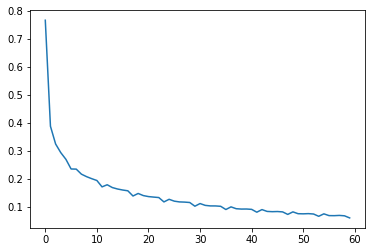

In [6]:
plt.plot(hist)